# DryCode

DATA ANALYTICS INTERNSHIP

TASK 1: CHURN PREDICTION IN TELECOM

BY : VAISHNAVI AGRAWAL

***INRODUCTION***

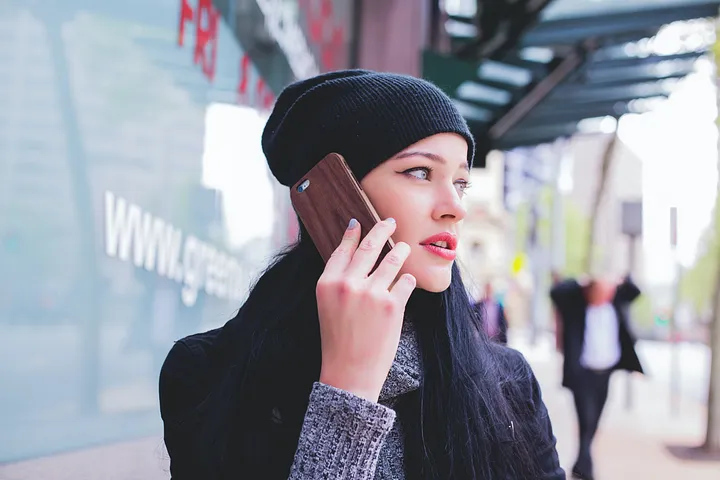

For Telco companies it is key to attract new customers and at the same time avoid contract terminations (=churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, for example better price offers, more interesting packages, bad service experiences or change of customers’ personal situations.

Churn analytics provides valuable capabilities to predict customer churn and also define the underlying reasons that drive it. The churn metric is mostly shown as the percentage of customers that cancel a product or service within a given period (mostly months). If a Telco company had 10 Mio. customers on the 1st of January and received 500K contract terminations until the 31st of January the monthly churn for January would be 5%.

Telcos apply machine learning models to predict churn on an individual customer basis and take counter measures such as discounts, special offers or other gratifications to keep their customers. A customer churn analysis is a typical classification problem within the domain of supervised learning.

In this example, a basic machine learning pipeline based on a sample data set from Kaggle is build and performance of different model types is compared. The pipeline used for this example consists of 8 steps:

Step 1: Problem Definition
Step 2: Data Collection
Step 3: Exploratory Data Analysis (EDA)
Step 4: Feature Engineering
Step 5: Train/Test Split
Step 6: Model Evaluation Metrics Definition
Step 7: Model Selection, Training, Prediction and Assessment
Step 8: Hyperparameter Tuning/Model Improvement


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Importing libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Processing

In [5]:
df=pd.read_csv('C:\\Users\\MITTAL\\Downloads\\archive (4)\Telecomchurn.csv')

In [6]:
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,Male,Yes,No,No,1,No,No phone service,DSL,No,No,...,No,Yes,Month-to-month,Yes,Electronic check,396.5,4758,0,0,Yes
1,Female,Yes,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Two year,Yes,Credit card (automatic),963.5,11562,0,0,No
2,Male,Yes,Yes,No,2,Yes,No,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Credit card (automatic),955.0,11460,0,0,No
3,Male,Yes,No,No,1,Yes,No,DSL,No,No,...,No,No,Month-to-month,No,Bank transfer (automatic),452.5,5430,0,0,No
4,Female,Yes,No,No,43,Yes,Yes,Fiber optic,No,Yes,...,Yes,No,Month-to-month,Yes,Electronic check,902.5,10830,0,0,No


In [7]:
df.tail()

,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paper_less_Billing,Payment_Method,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
1137,Female,Yes,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,1035.0,12420,0,0,No
1138,Female,Yes,No,No,6,No,No phone service,DSL,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,444.0,5328,0,0,No
1139,Male,Yes,Yes,No,55,Yes,Yes,DSL,Yes,Yes,...,No,No,One year,No,Credit card (automatic),600.0,7200,0,0,No
1140,Male,Yes,No,No,1,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,757.5,9090,0,0,Yes
1141,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,744.0,8928,0,0,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              1142 non-null   object 
 1   Senior_Citizen      1142 non-null   object 
 2   Partner             1142 non-null   object 
 3   Dependents          1142 non-null   object 
 4   Tenure              1142 non-null   int64  
 5   Phone_Service       1142 non-null   object 
 6   Multiple_Lines      1142 non-null   object 
 7   Internet_Service    1142 non-null   object 
 8   Online_Security     1142 non-null   object 
 9   Online_Backup       1142 non-null   object 
 10  Device_Protection   1142 non-null   object 
 11  Tech_Support        1142 non-null   object 
 12  Streaming_TV        1142 non-null   object 
 13  Streaming_Movies    1142 non-null   object 
 14  Contract            1142 non-null   object 
 15  Paper_less_Billing  1142 non-null   object 
 16  Paymen

In [9]:
df.describe() 


,Tenure,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets
count,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,33.295972,798.203590,9578.443082,0.513135,0.684764
std,24.188530,237.640267,2851.683204,1.296967,1.550357
min,1.000000,189.500000,2274.000000,0.000000,0.000000
25%,10.000000,701.500000,8418.000000,0.000000,0.000000
50%,31.000000,848.500000,10182.000000,0.000000,0.000000
75%,56.000000,980.750000,11769.000000,0.000000,0.000000
max,72.000000,1174.500000,14094.000000,5.000000,9.000000


In [10]:
df = df.drop(['Senior_Citizen','Partner','Dependents'],  axis = 1)
df = df.drop(['Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support'],axis = 1)
df = df.drop(["Streaming_TV", "Streaming_Movies", "Contract", "Paper_less_Billing", "Payment_Method"], axis = 1)
df.drop(["Monthly_Charges"],axis=1)

,Gender,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Yearly_Charge,Admin_Tickets,Tech_Tickets,Churn
0,Male,1,No,No phone service,DSL,4758,0,0,Yes
1,Female,71,Yes,Yes,Fiber optic,11562,0,0,No
2,Male,2,Yes,No,Fiber optic,11460,0,0,No
3,Male,1,Yes,No,DSL,5430,0,0,No
4,Female,43,Yes,Yes,Fiber optic,10830,0,0,No
...,...,...,...,...,...,...,...,...,...
1137,Female,63,Yes,Yes,Fiber optic,12420,0,0,No
1138,Female,6,No,No phone service,DSL,5328,0,0,No
1139,Male,55,Yes,Yes,DSL,7200,0,0,No
1140,Male,1,Yes,Yes,Fiber optic,9090,0,0,Yes


# EDA

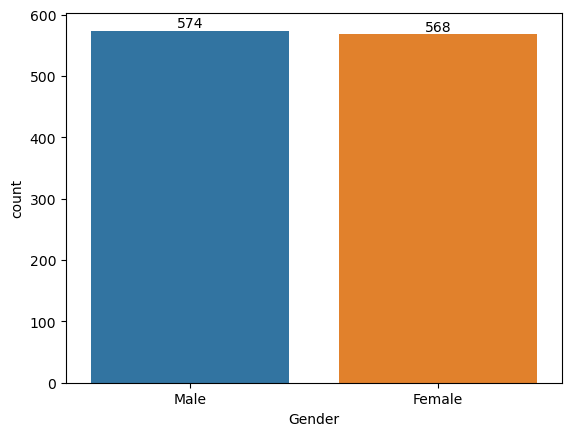

In [11]:
ax = sns.countplot(x = 'Gender',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Yearly_Charge', ylabel='Monthly_Charges'>

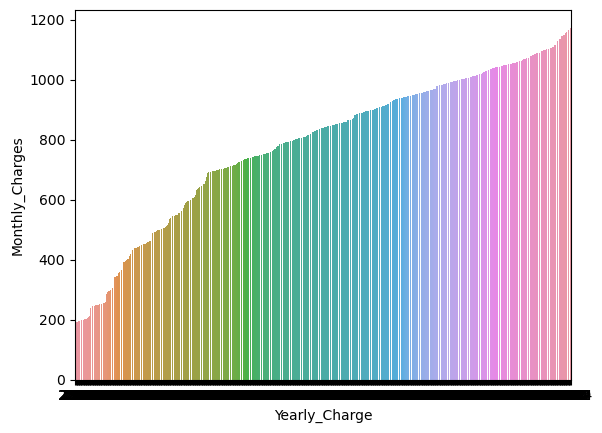

In [16]:
sns.barplot(x ='Yearly_Charge',y= 'Monthly_Charges' ,data = df)

#  Importing Label Encoder

In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [18]:
df['Gender']=le.fit_transform(df['Gender'])
df['Phone_Service']=le.fit_transform(df['Phone_Service'])
df['Multiple_Lines']=le.fit_transform(df['Multiple_Lines'])
df['Internet_Service']=le.fit_transform(df['Internet_Service'])
df['Churn']=le.fit_transform(df['Churn'])

In [19]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [21]:
X_train.head()

,Gender,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Monthly_Charges,Yearly_Charge,Admin_Tickets,Tech_Tickets
12,1,30,1,0,0,747.5,8970,0,0
758,0,36,1,2,1,749.0,8988,0,0
636,1,68,1,2,1,846.5,10158,0,0
1108,1,6,1,0,1,797.0,9564,0,0
743,0,66,1,2,0,805.5,9666,0,6


In [22]:
y_train.head()

12      0
758     0
636     0
1108    0
743     1
Name: Churn, dtype: int32

# Importing Machine learning

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = clf.predict(X_test)

In [26]:
accuracy = clf.score(X_test,y_test)
print(accuracy)

0.7903930131004366


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn= KNeighborsClassifier()

In [28]:
clf_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
y_knn_pred = clf_knn.predict(X_test)

C:\Users\MITTAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
accracy = clf_knn.score(X_test,y_test)
print(accracy)

0.6419213973799127


C:\Users\MITTAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Support Vector Classifier

In [31]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)

SVC()

In [32]:
y_svc_pred = clf_svm.predict(X_test) 

In [33]:
accuracy =clf_svm.score(X_test, y_test) 
print(accuracy)

0.6331877729257642


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [35]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
y_dt_pred = dt.predict(X_test)

In [37]:
accuracy = dt.score(X_test, y_test)
accuracy

0.7903930131004366

# Nayes Bias

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
NB = GaussianNB()
NB.fit(X_train, y_train)
y_nb_pred = NB.predict(X_test)

In [41]:
accuracy = NB.score(X_test, y_test)
print(accuracy)

0.7248908296943232


# Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [43]:
Rf = RandomForestClassifier(n_estimators = 4)
Rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=4)

In [44]:
y_rf_pred = Rf.predict(X_test)

In [45]:
accuracy = Rf.score(X_test, y_test)
print(accuracy)

0.8034934497816594


# Confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_rf_pred)

In [47]:
print(cm)

[[130  15]
 [ 30  54]]


# Boosting technique

# Adaboost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier()

In [49]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [50]:
y_ada_pred = ada.predict(X_test)

In [51]:
accuracy = ada.score(X_test, y_test)
print(accuracy)

0.8165938864628821


# Gradient Boost

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
xgb = GradientBoostingClassifier()

In [54]:
xgb.fit(X_train, y_train)

GradientBoostingClassifier()

In [55]:
y_xgb_pred = xgb.predict(X_test)

In [56]:
accuracy = xgb.score(X_test, y_test)
print(accuracy)

0.7947598253275109


# Overall Calculation

In [57]:
print("Logistic Regression:" , clf.score(X_test,y_test))
print("KNN:" , clf_knn.score(X_test,y_test))
print("Support Vector Meachine:", clf_svm.score(X_test, y_test))
print("Decission Tree:", dt.score(X_test, y_test))
print("Naive Bayes:", NB.score(X_test, y_test))
print("Ensemble- Random Forest:", Rf.score(X_test, y_test))
print("Ensemble- adaboost:", ada.score(X_test, y_test))
print("Ensemble- XGBoost:", xgb.score(X_test, y_test))

Logistic Regression: 0.7903930131004366
KNN: 0.6419213973799127
Support Vector Meachine: 0.6331877729257642
Decission Tree: 0.7903930131004366
Naive Bayes: 0.7248908296943232
Ensemble- Random Forest: 0.8034934497816594
Ensemble- adaboost: 0.8165938864628821
Ensemble- XGBoost: 0.7947598253275109


C:\Users\MITTAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
from sklearn.metrics import f1_score
f1_score(y_test, y_ada_pred, average='macro')

0.8070224719101123

In [59]:
from sklearn.metrics import f1_score
f1_score(y_test, y_xgb_pred, average='macro')

0.7806915663141594

*** PLZ Upvote if it is helpfull***